In [14]:
from statsbombpy import sb
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
# USE STATSBOMB LOGO IN REPORT!!!

# Ignore NoAuthWarning, since we are not using an API key
import warnings
warnings.filterwarnings('ignore', category=sb.api_client.NoAuthWarning)

import os # For iterating through directory

In [15]:
per_match_xgs = []
directory = 'shots_with_xg'
for match_file in tqdm(os.listdir(directory)):
    match_shots = pd.read_csv('/'.join([directory, match_file]))
    per_match_xgs.append(match_shots['shot_statsbomb_xg'])
xgs = pd.concat(per_match_xgs, ignore_index=True).to_numpy()

  0%|          | 0/2802 [00:00<?, ?it/s]

100%|██████████| 2802/2802 [00:21<00:00, 129.20it/s]


Number of samples: 71010
Results in 267 classes in the histogram


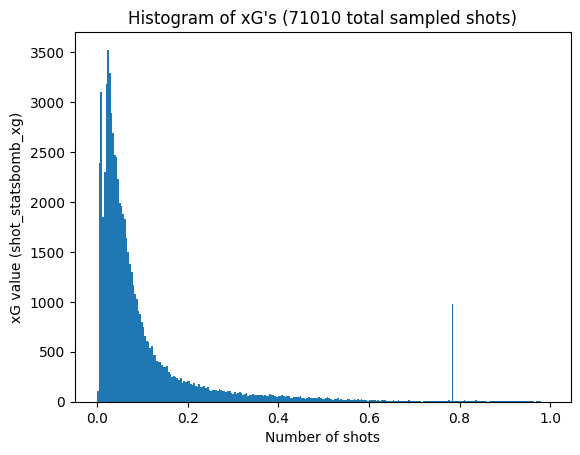

In [19]:
# Import matplotlib for plotting
from matplotlib import pyplot as plt
import numpy as np

# Number of classes in a histogram should be around sqrt(n), where n is the amount of samples
number_of_classes = int(np.ceil(np.sqrt(len(xgs))))
print(f'Number of samples: {len(xgs)}\nResults in {number_of_classes} classes in the histogram')
plt.hist(xgs, bins=number_of_classes)
plt.title(f'Histogram of xG\'s ({len(xgs)} total sampled shots)')
plt.xlabel('Number of shots')
plt.ylabel('xG value (shot_statsbomb_xg)')
plt.savefig('raw_xg1_histogram.png')

In [ ]:
#TODO Change code in cell before such that I get the binned numpy array already. This can then be used to get the relative frequency